In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from numpy.lib.stride_tricks import sliding_window_view as sliding_window_view

In [2]:
data = pd.read_csv("../build/hist.csv", header=None).values

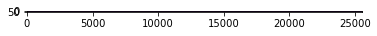

In [3]:
# fig, ax = plt.subplots(figsize=(16,9))
plt.imshow(data.T)

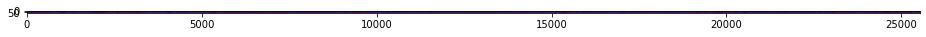

In [4]:
data = data/np.linalg.norm(data, axis=1,keepdims=True)
fig, ax = plt.subplots(figsize=(16,9))
plt.imshow(data.T)

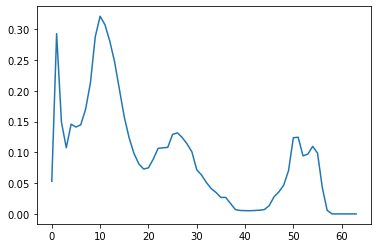

In [5]:
plt.plot(data[1400])

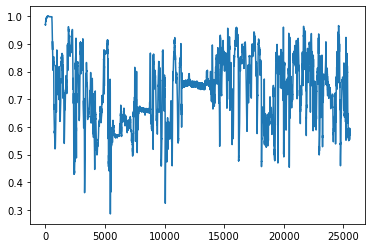

In [6]:
plt.plot([np.dot(data[200], row) for row in data])

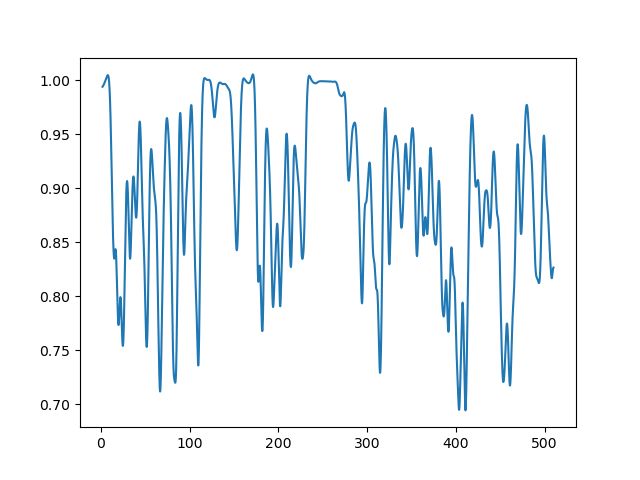

In [9]:
winsize=120
trace = [np.dot(np.mean(data[i:i+winsize], axis=0), data[i]) for i in range(data.shape[0] - winsize)]
trace_filt = scipy.signal.filtfilt(*scipy.signal.butter(2, .005), trace)
%matplotlib widget
plt.plot((np.array(range(data.shape[0] - winsize))+90)/50, trace_filt)